<a href="https://colab.research.google.com/github/BettySanchez7/AirDataMx/blob/main/Notebooks/MODULO%205/PerceptonMultiplica/DatosNO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import Dense
import math

CARGAMOS LOS DATOS

In [2]:
url = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/CO_mensual.csv"
url2 ="https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/SO2_mensual.csv"
url3 = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/PM10_mensual.csv"
url4 = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/O3_mensual.csv"
url5 = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/NO2_mensual.csv"
df = pd.read_csv(url5,usecols=[1])
df2 = pd.read_csv(url5,usecols=[2])
df3 = pd.read_csv(url5,usecols=[3])
df4 = pd.read_csv(url5,usecols=[4])
df5 = pd.read_csv(url5,usecols=[5])

In [3]:
df = df.values
df = df.astype('float32')
df2 = df2.values
df2 = df2.astype('float32')
df3 = df3.values
df3 = df3.astype('float32')
df4 = df4.values
df4 = df4.astype('float32')
df5 = df5.values
df5 = df5.astype('float32')

In [4]:
#noreste_dioxido_de_azufre
train_size = int(len(df)*.67)
test_size = len(df) - train_size
train, test = df[0:train_size,:],df[train_size:len(df),:]
print(len(train),len(test))

128 64


In [5]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [6]:
look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [7]:
model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

Epoch 1/800
52/52 - 21s - loss: 83.9431
Epoch 2/800
52/52 - 0s - loss: 9.2299
Epoch 3/800
52/52 - 0s - loss: 5.2717
Epoch 4/800
52/52 - 0s - loss: 5.0906
Epoch 5/800
52/52 - 0s - loss: 5.0994
Epoch 6/800
52/52 - 0s - loss: 5.0760
Epoch 7/800
52/52 - 0s - loss: 5.0524
Epoch 8/800
52/52 - 0s - loss: 4.9978
Epoch 9/800
52/52 - 0s - loss: 4.7281
Epoch 10/800
52/52 - 0s - loss: 4.8364
Epoch 11/800
52/52 - 0s - loss: 4.5454
Epoch 12/800
52/52 - 0s - loss: 4.3024
Epoch 13/800
52/52 - 0s - loss: 4.0959
Epoch 14/800
52/52 - 0s - loss: 3.8524
Epoch 15/800
52/52 - 0s - loss: 3.7262
Epoch 16/800
52/52 - 0s - loss: 3.6396
Epoch 17/800
52/52 - 0s - loss: 3.5140
Epoch 18/800
52/52 - 0s - loss: 3.2863
Epoch 19/800
52/52 - 0s - loss: 3.2372
Epoch 20/800
52/52 - 0s - loss: 3.1437
Epoch 21/800
52/52 - 0s - loss: 3.1138
Epoch 22/800
52/52 - 0s - loss: 3.0565
Epoch 23/800
52/52 - 0s - loss: 2.9689
Epoch 24/800
52/52 - 0s - loss: 3.0107
Epoch 25/800
52/52 - 0s - loss: 2.8263
Epoch 26/800
52/52 - 0s - loss: 

In [8]:
# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Resultado del entrenamiento: 0.17 MSE (0.41 RMSE)
Resultado del test: 4.86 MSE (2.20 RMSE)


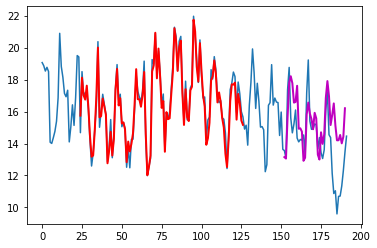

In [9]:
# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/800
52/52 - 1s - loss: 97.8415
Epoch 2/800
52/52 - 0s - loss: 9.9631
Epoch 3/800
52/52 - 0s - loss: 3.6640
Epoch 4/800
52/52 - 0s - loss: 3.2473
Epoch 5/800
52/52 - 0s - loss: 3.2849
Epoch 6/800
52/52 - 0s - loss: 3.2767
Epoch 7/800
52/52 - 0s - loss: 3.3276
Epoch 8/800
52/52 - 0s - loss: 3.2509
Epoch 9/800
52/52 - 0s - loss: 3.2454
Epoch 10/800
52/52 - 0s - loss: 3.2334
Epoch 11/800
52/52 - 0s - loss: 3.2537
Epoch 12/800
52/52 - 0s - loss: 3.2108
Epoch 13/800
52/52 - 0s - loss: 3.1753
Epoch 14/800
52/52 - 0s - loss: 3.2380
Epoch 15/800
52/52 - 0s - loss: 3.1028
Epoch 16/800
52/52 - 0s - loss: 3.0338
Epoch 17/800
52/52 - 0s - loss: 2.9141
Epoch 18/800
52/52 - 0s - loss: 2.9017
Epoch 19/800
52/52 - 0s - loss: 3.0653
Epoch 20/800
52/52 - 0s - loss: 2.7081
Epoch 21/800
52/52 - 0s - loss: 2.6409
Epoch 22/800
52/52 - 0s - loss: 2.5782
Epoch 23/800
52/52 - 0s - loss: 2.3195
Epoch 24/800
52/52 - 0s - loss: 2.2995
Epoch 25/800
52/52 - 0s - loss: 2.1538
Epoch 26/800
52/52 - 0s - 

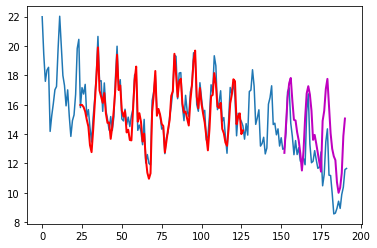

In [10]:
#	suroeste_dioxido_de_azufre
train_size = int(len(df2)*.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:],df2[train_size:len(df2),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df2)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/800
52/52 - 1s - loss: 148.7384
Epoch 2/800
52/52 - 0s - loss: 26.5268
Epoch 3/800
52/52 - 0s - loss: 8.4329
Epoch 4/800
52/52 - 0s - loss: 4.7532
Epoch 5/800
52/52 - 0s - loss: 4.1981
Epoch 6/800
52/52 - 0s - loss: 4.1567
Epoch 7/800
52/52 - 0s - loss: 4.1776
Epoch 8/800
52/52 - 0s - loss: 4.1466
Epoch 9/800
52/52 - 0s - loss: 4.0849
Epoch 10/800
52/52 - 0s - loss: 3.9785
Epoch 11/800
52/52 - 0s - loss: 4.0179
Epoch 12/800
52/52 - 0s - loss: 3.9255
Epoch 13/800
52/52 - 0s - loss: 3.7620
Epoch 14/800
52/52 - 0s - loss: 3.5897
Epoch 15/800
52/52 - 0s - loss: 3.3293
Epoch 16/800
52/52 - 0s - loss: 3.3659
Epoch 17/800
52/52 - 0s - loss: 3.1526
Epoch 18/800
52/52 - 0s - loss: 2.8698
Epoch 19/800
52/52 - 0s - loss: 2.9911
Epoch 20/800
52/52 - 0s - loss: 2.5413
Epoch 21/800
52/52 - 0s - loss: 2.3201
Epoch 22/800
52/52 - 0s - loss: 2.2409
Epoch 23/800
52/52 - 0s - loss: 2.2601
Epoch 24/800
52/52 - 0s - loss: 2.1410
Epoch 25/800
52/52 - 0s - loss: 1.9158
Epoch 26/800
52/52 - 0s 

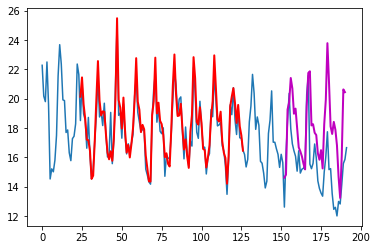

In [11]:
#	noroeste_dioxido_de_azufre
train_size = int(len(df3)*.67)
test_size = len(df3) - train_size
train, test = df3[0:train_size,:],df3[train_size:len(df3),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df3)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df3)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df3)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/800
52/52 - 1s - loss: 81.7015
Epoch 2/800
52/52 - 0s - loss: 9.2140
Epoch 3/800
52/52 - 0s - loss: 7.1211
Epoch 4/800
52/52 - 0s - loss: 7.0708
Epoch 5/800
52/52 - 0s - loss: 7.0602
Epoch 6/800
52/52 - 0s - loss: 7.2780
Epoch 7/800
52/52 - 0s - loss: 7.0168
Epoch 8/800
52/52 - 0s - loss: 7.0161
Epoch 9/800
52/52 - 0s - loss: 7.0439
Epoch 10/800
52/52 - 0s - loss: 6.7730
Epoch 11/800
52/52 - 0s - loss: 6.7024
Epoch 12/800
52/52 - 0s - loss: 6.5555
Epoch 13/800
52/52 - 0s - loss: 6.9784
Epoch 14/800
52/52 - 0s - loss: 6.4242
Epoch 15/800
52/52 - 0s - loss: 6.0730
Epoch 16/800
52/52 - 0s - loss: 6.4418
Epoch 17/800
52/52 - 0s - loss: 6.0849
Epoch 18/800
52/52 - 0s - loss: 5.7364
Epoch 19/800
52/52 - 0s - loss: 6.2045
Epoch 20/800
52/52 - 0s - loss: 6.0252
Epoch 21/800
52/52 - 0s - loss: 5.8160
Epoch 22/800
52/52 - 0s - loss: 5.5991
Epoch 23/800
52/52 - 0s - loss: 5.5593
Epoch 24/800
52/52 - 0s - loss: 5.5891
Epoch 25/800
52/52 - 0s - loss: 6.2542
Epoch 26/800
52/52 - 0s - 

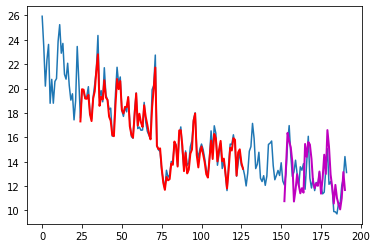

In [12]:
#sureste_dioxido_de_azufre
train_size = int(len(df4)*.67)
test_size = len(df4) - train_size
train, test = df4[0:train_size,:],df4[train_size:len(df4),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df4)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df4)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df4)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/800
52/52 - 1s - loss: 136.3726
Epoch 2/800
52/52 - 0s - loss: 18.1434
Epoch 3/800
52/52 - 0s - loss: 6.0312
Epoch 4/800
52/52 - 0s - loss: 4.5792
Epoch 5/800
52/52 - 0s - loss: 4.4934
Epoch 6/800
52/52 - 0s - loss: 4.4809
Epoch 7/800
52/52 - 0s - loss: 4.4453
Epoch 8/800
52/52 - 0s - loss: 4.4476
Epoch 9/800
52/52 - 0s - loss: 4.4131
Epoch 10/800
52/52 - 0s - loss: 4.3707
Epoch 11/800
52/52 - 0s - loss: 4.3750
Epoch 12/800
52/52 - 0s - loss: 4.4186
Epoch 13/800
52/52 - 0s - loss: 4.1747
Epoch 14/800
52/52 - 0s - loss: 4.1559
Epoch 15/800
52/52 - 0s - loss: 3.9905
Epoch 16/800
52/52 - 0s - loss: 4.0358
Epoch 17/800
52/52 - 0s - loss: 3.9280
Epoch 18/800
52/52 - 0s - loss: 3.8539
Epoch 19/800
52/52 - 0s - loss: 3.4836
Epoch 20/800
52/52 - 0s - loss: 3.2884
Epoch 21/800
52/52 - 0s - loss: 3.7240
Epoch 22/800
52/52 - 0s - loss: 3.2910
Epoch 23/800
52/52 - 0s - loss: 3.1068
Epoch 24/800
52/52 - 0s - loss: 2.9714
Epoch 25/800
52/52 - 0s - loss: 2.9386
Epoch 26/800
52/52 - 0s 

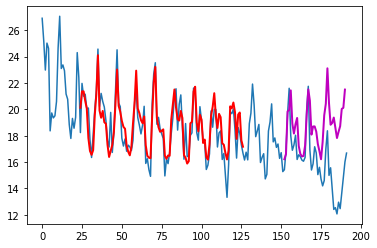

In [13]:
#centro_dioxido_de_azufre
train_size = int(len(df5)*.67)
test_size = len(df5) - train_size
train, test = df5[0:train_size,:],df5[train_size:len(df5),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df5)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df5)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df5)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df5)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

In [14]:
df = pd.read_csv(url)

In [15]:
df

,fecha,noreste_monoxido_de_carbono,suroeste_monoxido_de_carbono,noroeste_monoxido_de_carbono,sureste_monoxido_de_carbono,centro_monoxido_de_carbono
0,2005-01-31,17.379032,17.501344,18.849462,22.038978,22.013441
1,2005-02-28,16.300595,14.505952,16.983631,19.949405,19.897321
2,2005-03-31,15.766129,13.456989,17.076613,17.314516,20.239247
3,2005-04-30,14.031944,14.483333,18.434722,18.925000,21.051389
4,2005-05-31,16.165323,14.461022,16.596774,20.306452,19.369624
...,...,...,...,...,...,...
187,2020-08-31,4.515812,3.047297,4.209270,4.165775,4.095277
188,2020-09-30,4.385783,3.289151,4.452357,4.617134,4.198453
189,2020-10-31,5.784629,3.226774,4.613840,4.910398,5.146353
190,2020-11-30,6.545849,3.615487,4.801608,5.517874,5.510429
